In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [17]:
df = gpd.read_file("../data/ny_scenes.shp")
df = df.rename(columns={"dataset_na": "dataset_name"})
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
df_high_res = df[df["dataset_name"] == "high_res_ortho"]
df_naip = df[df["dataset_name"] == "naip"]

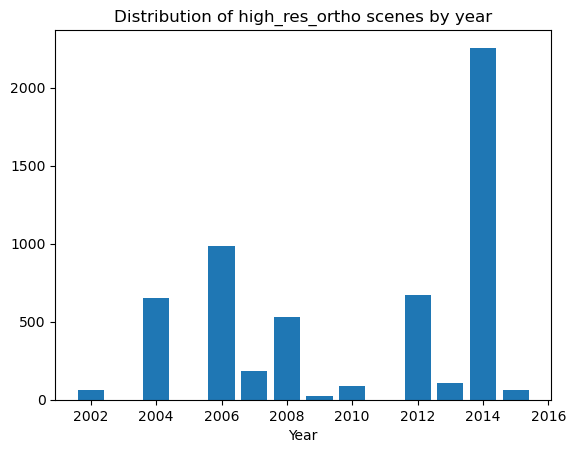

In [18]:
plt.bar(
    df_high_res.start_date.dt.year.value_counts().index, 
    df_high_res.start_date.dt.year.value_counts().values
)
plt.title("Distribution of high_res_ortho scenes by year")
plt.xlabel("Year")
plt.show()

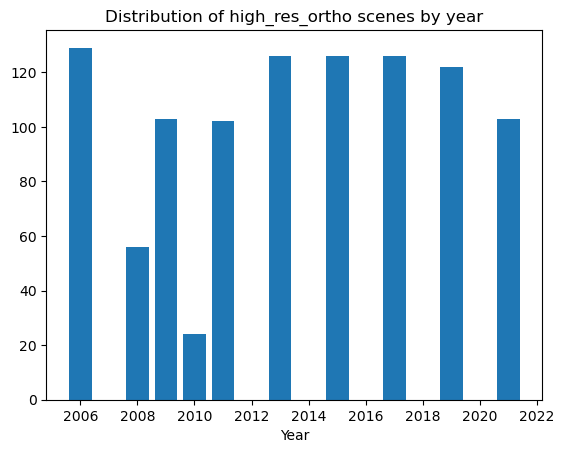

In [19]:
plt.bar(
    df_naip.start_date.dt.year.value_counts().index, 
    df_naip.start_date.dt.year.value_counts().values
)
plt.title("Distribution of high_res_ortho scenes by year")
plt.xlabel("Year")
plt.show()

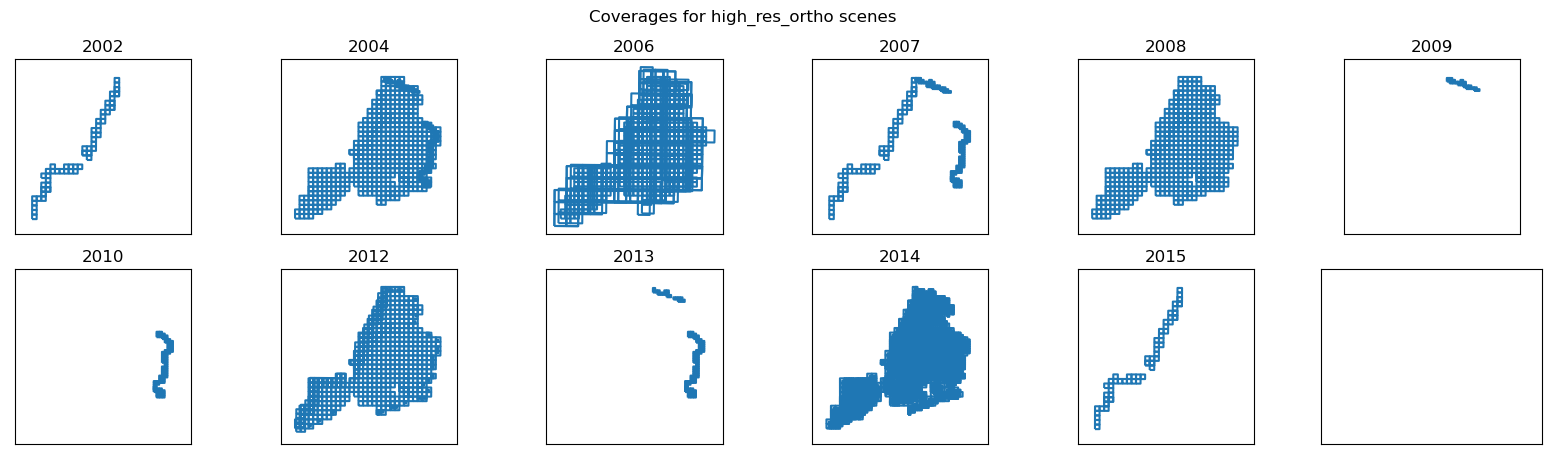

In [35]:
unique_years = df_high_res.start_date.dt.year.unique()
unique_years.sort()
fig, axs = plt.subplots(nrows = 2, ncols =  (len(unique_years)  + 1 )//2 , figsize = (20, 5), sharex = True, sharey = True)
axs = axs.flatten()
for i, year in enumerate(unique_years):

    df_high_res[(df_high_res["start_date"].dt.year == year)].boundary.plot(ax = axs[i])    
    axs[i].set_title(f"{year}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.suptitle("Coverages for high_res_ortho scenes")
plt.show()

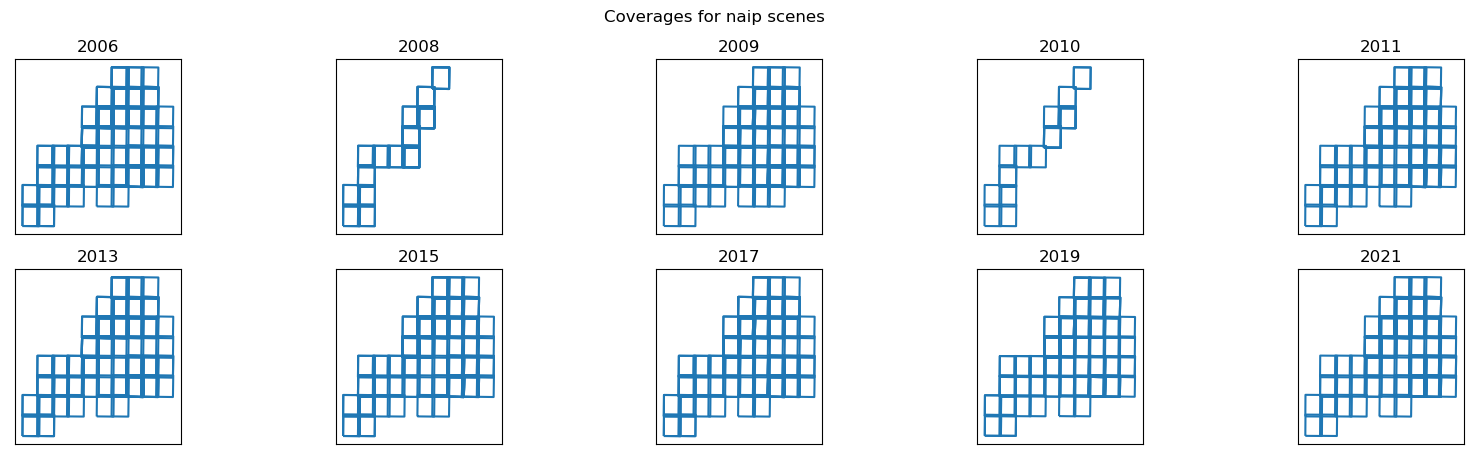

In [34]:
unique_years = df_naip.start_date.dt.year.unique()
unique_years.sort()
fig, axs = plt.subplots(nrows = 2, ncols = (len(unique_years)  + 1 )//2 , figsize = (20, 5), sharex = True, sharey = True)
axs = axs.flatten()
for i, year in enumerate(unique_years):

    df_naip[(df_naip["start_date"].dt.year == year)].boundary.plot(ax = axs[i])    
    axs[i].set_title(f"{year}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.suptitle("Coverages for naip scenes")
plt.show()